In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest , SelectPercentile

In [3]:
path = (r"/content/drive/My Drive/Colab Notebooks/KGP Talkie DL/02 Feature Selection/datasets/Data-Files-for-Feature-Selection/santander-train.csv")
data = pd.read_csv(path , nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
X = data.drop("TARGET" , axis = 1)
y = data["TARGET"]

X.shape , y.shape

((20000, 370), (20000,))

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 0 , stratify = y)

## Remove Constant , Quasi-Constant and Duplicate Features

In [0]:
# Remove constant and quasi-constant features
constant_filter = VarianceThreshold(threshold = 0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [7]:
X_train_filter.shape , X_test_filter.shape

((16000, 245), (4000, 245))

In [0]:
# Remove the Duplicate features
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [0]:
X_train_T =pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [10]:
X_train_T.duplicated().sum()

18

In [11]:
X_train_T.duplicated().sum()

18

In [0]:
duplicated_features = X_train_T.duplicated()

In [0]:
features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [14]:
X_train_unique.shape , X_train.shape

((16000, 227), (16000, 370))

## Now Performing the F-test

In [15]:
sel = f_classif(X_train_unique , y_train)
sel

(array([3.42911520e-01, 1.22929093e+00, 1.61291330e+02, 4.01025132e-01,
        8.37661151e-01, 2.39279390e-03, 4.41633351e-02, 1.36337510e-01,
        1.84647123e+00, 2.03640367e+00, 7.98057954e-03, 1.14063993e+00,
        6.32266614e-03, 1.55626237e+01, 1.53553790e+01, 1.28615978e+01,
        1.61834746e+01, 1.59638013e+01, 1.21977511e+01, 9.03776687e-02,
        1.00443179e+00, 1.53946148e+01, 2.50428951e+02, 2.98696944e+01,
        1.06266841e+01, 2.63630437e+01, 1.66417611e+01, 3.13699473e+01,
        2.47256550e+01, 2.60021376e+01, 3.26742018e+01, 9.94259060e+00,
        1.48208220e+01, 1.50040146e+01, 1.34739830e+01, 7.03118653e+00,
        1.36234772e+01, 7.95962134e+00, 3.15161070e+02, 1.79631284e+00,
        1.66910747e+00, 1.21138302e+01, 1.10928892e+01, 1.00443179e+00,
        2.31851572e+00, 8.93973153e+01, 7.53868668e+00, 2.38490562e+02,
        2.98696944e+01, 1.06266841e+01, 2.61694409e+01, 1.66053267e+01,
        2.93013259e+01, 2.44433356e+01, 2.60021376e+01, 5.596238

In [0]:
p_values = pd.Series(sel[1])
p_values.index = X_train_unique.columns
p_values.sort_values(ascending = True , inplace = True)

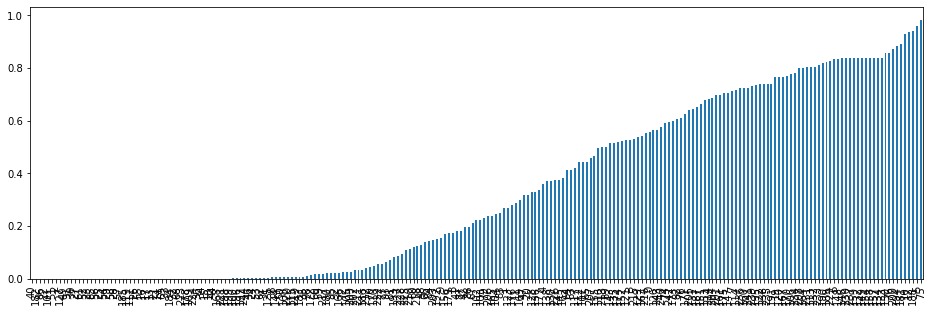

In [19]:
p_values.plot.bar(figsize = (16,5))

In [20]:
p_values

40     7.665738e-70
182    1.494938e-68
86     4.187175e-61
22     5.565785e-56
101    3.557912e-55
           ...     
10     9.288175e-01
12     9.366238e-01
188    9.388951e-01
5      9.609867e-01
75     9.826291e-01
Length: 227, dtype: float64

In [21]:
# Theoretically important Features
p_values[p_values<0.05]

40     7.665738e-70
182    1.494938e-68
86     4.187175e-61
22     5.565785e-56
101    3.557912e-55
           ...     
211    3.232153e-02
186    3.342479e-02
212    4.162651e-02
70     4.286237e-02
110    4.639047e-02
Length: 88, dtype: float64

In [23]:
p_values.index

Int64Index([ 40, 182,  86,  22, 101,  51,   2, 127,  49,  91,
            ...
            150,  76, 200, 194, 181,  10,  12, 188,   5,  75],
           dtype='int64', length=227)

In [0]:
X_train_p = X_train_unique[p_values.index]
X_test_p = X_test_unique[p_values.index]

## Build the classifiers and compare the performances

In [0]:
def run_randomForest(X_train , X_test , y_train , y_test):
    clf = RandomForestClassifier(n_estimators= 100 , random_state= 0, n_jobs=-1)
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    print("Accuract on the test set: ", accuracy_score(y_test , y_pred))

In [30]:
%%time
run_randomForest(X_train_p , X_test_p, y_train , y_test)

Accuract on the test set:  0.9585
CPU times: user 4.97 s, sys: 26.3 ms, total: 5 s
Wall time: 2.66 s


In [31]:
%%time
run_randomForest(X_train , X_test, y_train , y_test)

Accuract on the test set:  0.9585
CPU times: user 5.69 s, sys: 26.3 ms, total: 5.72 s
Wall time: 3.1 s
